# *Handwritten Digit Recognition*
---
## Exploratory Data Analysis

In [91]:
import sys
print(sys.executable)

/Users/saiganesh/miniconda3/envs/handwriting-recognition/bin/python


In [92]:
## Lets load the dataset first.

# From tensorflow
from tensorflow.keras.datasets import mnist

# this will auto-download (first time) add cache the files for you:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


print("Training data:", X_train.shape, y_train.shape)
print("Test data:", X_test.shape, y_test.shape)

Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


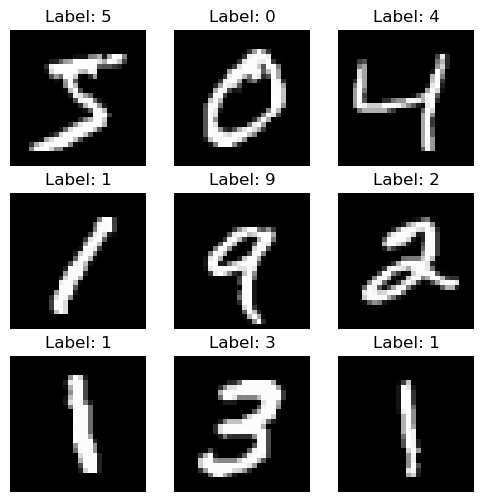

In [93]:
# we want to take a look at the data first. 
# View some raw examples

import matplotlib.pyplot as plt
# show the first 9 digits in the training set
fig, axes = plt.subplots(3, 3, figsize=(6,6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.show()


In [94]:
# Check class balance:
# By class we mean labels: 0 through 9
import numpy as np
counts = np.bincount(y_train)
for digit, cnt in enumerate(counts):
    print(f"{digit}: {cnt}")

0: 5923
1: 6742
2: 5958
3: 6131
4: 5842
5: 5421
6: 5918
7: 6265
8: 5851
9: 5949


In [95]:
# inspect pixel statistics
print("Pixel min/max:", X_train.min(), X_train.max())
print("Mean/Std:", X_train.mean(), X_train.std())

Pixel min/max: 0 255
Mean/Std: 33.318421449829934 78.56748998339798


In [96]:
(X_train_copy, y_train_copy), (X_test_copy, y_test_copy) = mnist.load_data()

# 2) Inspect dtype and min/max to confirm it really is 0–255
print("dtype:", X_train_copy.dtype)
print("min, max:", X_train_copy.min(), X_train_copy.max())

# 3) Flatten into vectors but don’t divide by 255
raw_flat = X_train_copy.reshape(-1, 28*28)

# 4) Print the *first* 20 pixels of the first 3 images, as ints
for i in range(3):
    vals = raw_flat[i][:300].tolist()      # turn into a Python list so printing is unambiguous
    print(f"Sample {i}, label={y_train_copy[i]} → {vals}")

dtype: uint8
min, max: 0 255
Sample 0, label=5 → [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 18, 18, 18, 126, 136, 175, 26, 166, 255, 247, 127, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 36, 94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251, 93, 82, 82, 56, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 156, 107, 253, 253, 205, 11, 0, 43, 154, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [97]:
from sklearn.model_selection import train_test_split

# Flatten
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test  = X_test.reshape(-1,  28*28) / 255.0

# split training into training and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print("Shapes →",
      "Train:", X_train.shape, y_train.shape,
      "Val:",   X_val.shape,   y_val.shape,
      "Test:",  X_test.shape,  y_test.shape)

Shapes → Train: (48000, 784) (48000,) Val: (12000, 784) (12000,) Test: (10000, 784) (10000,)


In [98]:
# Now just print out the first 300 pixel values of X_train's first 3 samples after dividing each by 255
for i in range(3):
    vals = X_train[i][:300].tolist()      # turn into a Python list so printing is unambiguous
    print(f"Sample {i}, label={y_train[i]} → {vals}")
# We shoould be able to see the same lists as above, but this time, the number being between 0 and 1.

Sample 0, label=5 → [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06666666666666667, 0.1843137254901961, 0.1843137254901961, 0.1843137254901961, 0.1843137254901961, 0.1843137254901961, 0.1843137254901961, 0.10980392156862745, 0.0, 0.0, 0.0, 0.0, 0.

In [99]:
# Now for each of the classes, 0-9, we need to do one-hot encoding. 
'''
if we have 
apple -> 0
banana -> 1
grape -> 2

we can change it to 
apple -> [1, 0, 0]
banana -> [0, 1, 0]
grape -> [0, 0, 1]

this is one-hot encoding
'''
# This is used for comparing what our model outputs, [0.01, 0.3, 0.2, ...., 0.8] with [0, 0, 0, ..., 1] (10 vs 10)
# One-hot = a way to tell the model exactly which class is correct by placing a single 1 in the slot of the true class and zeros elsewhere.
from sklearn.preprocessing import OneHotEncoder

# tell it to produce a dense (NumPy) array
enc = OneHotEncoder(sparse_output=False, categories='auto')

Y_train = enc.fit_transform(y_train.reshape(-1, 1))
Y_val   = enc.transform(   y_val.reshape(-1, 1))
Y_test  = enc.transform(   y_test.reshape(-1, 1))

for i in range(5):
    print(f"{y_train[i]} = Y_train[{i}] = {Y_train[i]}")


5 = Y_train[0] = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
0 = Y_train[1] = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 = Y_train[2] = [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
6 = Y_train[3] = [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
1 = Y_train[4] = [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


---
**Why zero initialize?**  
- For a single-layer softmax, starting at zero means every class predicts the same probability (1/10) initially.
- During training, the gradients will nudge the weights/biases away from zero toward useful values.
- In multi-layer nets you need random initialization to break symmetry, but here zeros are fine for learning the simple linear mapping.

In [100]:
## Lets now set up the parameters for the softmax classifier

import numpy as np

# How many features (pixels) per sample?
n_features = X_train.shape[1] #784

# How many classes are we predicting? (digits 0 to 9)
n_classes = Y_train.shape[1] # 10

# Initialize the weight matrix W to all zeros
# Shape: (n_features, n_classes) = (784, 10)
W = np.zeros((n_features, n_classes))

# Initialize the bias vector b to all zeros
# Shape: (1, n_classes) = (1, 10)
b = np.zeros((1, n_classes))

# Next step, we have to implement a simple function to compute the logits Z = XW + b, for each class

def compute_logits(X, W, b):
    """
    Compute the raw class scores (logits) for each example.

    Parameters:
    -----------
    X: numpy.ndarray of shape (N, D)
    Batch of N examples, each with D features (e.g. 784 pixels).

    W: numpy.ndarray of shape (D, C)
    Weight matrix mapping D features to C classes.

    b: numpy.ndarray of shape (1, C)
    Bias vector for the C classes

    Returns:
    --------
    Z: numpy.ndarray of shape (N, C)
    The raw scores for each of the C classes per example.
    
    """
    # Matrix-multiply features by weights, then add the bias
    Z = X.dot(W) + b # (N, D) @ (D, C) => (N, C), then broadcast-add (1, C)
    return Z


In [101]:
# Now it is time for us to compute the 10 raw scores
all_raw_scores = compute_logits(X_train, W, b)
print("All scores shape:", all_raw_scores.shape)

All scores shape: (48000, 10)


In [102]:
# now that we have the raw scores, it is time to feed it into the softmax function
def softmax(logits):
    """
    Compute the softmax probabilities for each row of logits.

    Parameters
    ----------
    logits : numpy.ndarray of shape (N, C)
        Raw class scores for N examples and C classes.

    Returns
    -------
    probs : numpy.ndarray of shape (N, C)
        Softmax probabilities that sum to 1 across each row.
    """
    # 1. Subtract max per row for numerical stability 
    shifted = logits - np.max(logits, axis=1, keepdims=True)

    # 2. Exponentiate
    exp_scores = np.exp(shifted)

    # 3. Normalize each row to sum to 1
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return probs

In [103]:
# fake logits for 3 examples, 4 classes
logits = np.array([[1.0, 2.0, 3.0, 2.0],
                   [0.0, 0.0, 0.0, 0.0],
                   [10.0, 5.0, 0.0, -5.0]])

probs = softmax(logits)
print(probs)
# Each row should sum to 1
print("Row sums:", probs.sum(axis=1))

[[7.23294881e-02 1.96611933e-01 5.34446645e-01 1.96611933e-01]
 [2.50000000e-01 2.50000000e-01 2.50000000e-01 2.50000000e-01]
 [9.93262055e-01 6.69254708e-03 4.50940275e-05 3.03841168e-07]]
Row sums: [1. 1. 1.]


In [104]:
# fully vectorized cross-entropy loss function implementation to be paired with softmax function

def cross_entropy_loss(probs, Y):
    """
    Compute the average cross-entropy loss.

    Parameters
    ----------
    probs : numpy.ndarray of shape (N, C)
        Softmax probabilities for N examples over C classes.
    Y : numpy.ndarray of shape (N, C)
        One-hot encoded true labels.

    Returns
    -------
    loss : float
        The average cross-entropy loss over the N examples.
    """
    eps = 1e-8 # for numerical stability

    # compute per example loss: -sum(y * log(p))
    per_example = -np.sum(Y * np.log(probs + eps), axis=1)
    # return the mean over all examples
    return np.mean(per_example)

In [105]:
# toy logits and one-hot labels for 3 examples, 4 classes
logits = np.array([[1.0, 2.0, 3.0, 2.0],
                   [0.0, 0.0, 0.0, 0.0],
                   [10.0, 5.0, 0.0, -5.0]])

# reuse the softmax you defined earlier
probs = softmax(logits)

# toy true labels: classes 2, 0, and 0 respectively
Y_true = np.array([[0,0,1,0],
                   [1,0,0,0],
                   [1,0,0,0]])

loss = cross_entropy_loss(probs, Y_true)
print("Cross-entropy loss:", loss)

Cross-entropy loss: 0.6731928049219648


In [106]:
def compute_gradients(X, P, Y):
    """
    Compute gradients of the cross-entropy loss w.r.t. W and b.

    Parameters
    ----------
    X : numpy.ndarray, shape (N, D)
        Input features (flattened images).
    P : numpy.ndarray, shape (N, C)
        Softmax probabilities from the forward pass.
    Y : numpy.ndarray, shape (N, C)
        One-hot true labels.

    Returns
    -------
    dW : numpy.ndarray, shape (D, C)
        Gradient of the loss w.r.t. W.
    db : numpy.ndarray, shape (1, C)
        Gradient of the loss w.r.t. b.
    """
    N = X.shape[0]
    # 1. error signal
    dZ = (P - Y) / N           # shape (N, C)
    # 2. gradients
    dW = X.T.dot(dZ)           # shape (D, C)
    db = np.sum(dZ, axis=0, keepdims=True)  # shape (1, C)
    return dW, db

In [107]:
# take first 100 examples
batch_X = X_train[:100]
batch_Y = Y_train[:100]

# forward
logits = compute_logits(batch_X, W, b)
probs  = softmax(logits)

# compute grads
dW, db = compute_gradients(batch_X, probs, batch_Y)

print("dW shape:", dW.shape)  # → (784, 10)
print("db shape:", db.shape)  # → (1, 10)
print("dW sample:", dW[:5, :3])  # small slice of dW to inspect
print("db:", db)


dW shape: (784, 10)
db shape: (1, 10)
dW sample: [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
db: [[ 3.90312782e-17 -1.00000000e-02  4.00000000e-02  2.00000000e-02
   1.00000000e-02  1.00000000e-02 -3.00000000e-02 -1.00000000e-02
  -2.00000000e-02 -1.00000000e-02]]


In [108]:
## Its time for our training loop!!!

# Hyperparameters
learning_rate = 0.4
epochs = 500

# For tracking
train_losses = []
val_losses   = []

for epoch in range(1, epochs+1):
    # ——— Training step ———
    # 1. Forward pass on TRAIN
    Z_train = compute_logits(X_train, W, b)   # (48000,10)
    P_train = softmax(Z_train)                # (48000,10)
    loss_train = cross_entropy_loss(P_train, Y_train)
    
    # 2. Backward pass (compute gradients)
    dW, db_grad = compute_gradients(X_train, P_train, Y_train)
    
    # 3. Parameter update
    W -= learning_rate * dW
    b -= learning_rate * db_grad

    # ——— Validation step ———
    Z_val = compute_logits(X_val, W, b)
    P_val = softmax(Z_val)
    loss_val = cross_entropy_loss(P_val, Y_val)
    
    # Record losses
    train_losses.append(loss_train)
    val_losses.append(loss_val)
    
    # Print progress every 10 epochs
    if epoch % 10 == 0 or epoch == 1:
        print(f"Epoch {epoch:2d} – Train Loss: {loss_train:.4f}, Val Loss: {loss_val:.4f}")

# Final evaluation on TEST set
Z_test = compute_logits(X_test, W, b)
P_test = softmax(Z_test)
loss_test = cross_entropy_loss(P_test, Y_test)
preds = np.argmax(P_test, axis=1)
accuracy = np.mean(preds == np.argmax(Y_test, axis=1))
print(f"\nTest Loss: {loss_test:.4f}, Test Accuracy: {accuracy:.4%}")

Epoch  1 – Train Loss: 2.3026, Val Loss: 1.9163
Epoch 10 – Train Loss: 0.9002, Val Loss: 0.8626
Epoch 20 – Train Loss: 0.6664, Val Loss: 0.6548
Epoch 30 – Train Loss: 0.5750, Val Loss: 0.5688
Epoch 40 – Train Loss: 0.5242, Val Loss: 0.5198
Epoch 50 – Train Loss: 0.4910, Val Loss: 0.4874
Epoch 60 – Train Loss: 0.4672, Val Loss: 0.4641
Epoch 70 – Train Loss: 0.4492, Val Loss: 0.4462
Epoch 80 – Train Loss: 0.4348, Val Loss: 0.4320
Epoch 90 – Train Loss: 0.4231, Val Loss: 0.4204
Epoch 100 – Train Loss: 0.4132, Val Loss: 0.4107
Epoch 110 – Train Loss: 0.4048, Val Loss: 0.4024
Epoch 120 – Train Loss: 0.3975, Val Loss: 0.3952
Epoch 130 – Train Loss: 0.3911, Val Loss: 0.3889
Epoch 140 – Train Loss: 0.3854, Val Loss: 0.3833
Epoch 150 – Train Loss: 0.3803, Val Loss: 0.3783
Epoch 160 – Train Loss: 0.3757, Val Loss: 0.3738
Epoch 170 – Train Loss: 0.3715, Val Loss: 0.3697
Epoch 180 – Train Loss: 0.3677, Val Loss: 0.3660
Epoch 190 – Train Loss: 0.3642, Val Loss: 0.3626
Epoch 200 – Train Loss: 0.3609

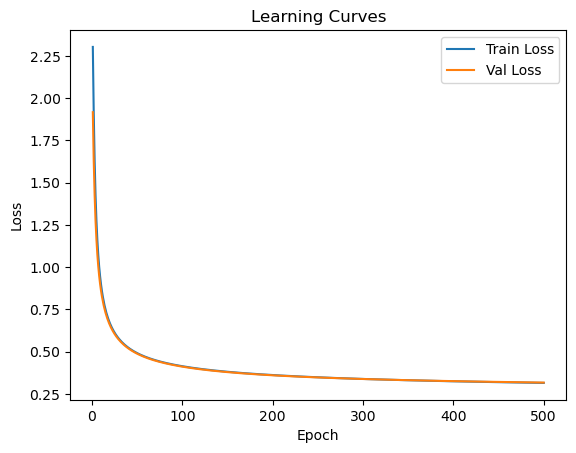

In [109]:
# Now visualize your learning curves:
import matplotlib.pyplot as plt

epochs = list(range(1, len(train_losses)+1))
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses,   label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curves')
plt.show()

In [110]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions on test set
preds = np.argmax(P_test, axis=1)
true  = np.argmax(Y_test, axis=1)

print(classification_report(true, preds))
cm = confusion_matrix(true, preds)
print("Confusion matrix:\n", cm)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.97      0.97      1135
           2       0.93      0.88      0.90      1032
           3       0.90      0.91      0.90      1010
           4       0.91      0.93      0.92       982
           5       0.91      0.86      0.88       892
           6       0.93      0.95      0.94       958
           7       0.92      0.91      0.92      1028
           8       0.87      0.88      0.88       974
           9       0.90      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

Confusion matrix:
 [[ 960    0    2    2    0    3   10    1    2    0]
 [   0 1104    2    3    1    3    4    1   17    0]
 [  11    7  904   16   14    1   14   18   40    7]
 [   3    1   24  915    0   25    2   11   18   11]
 [   1    